In [196]:
# Movie industry correlation data analysis

# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) 

# Read in movies data
df = pd.read_csv('movies.csv')

In [197]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [198]:
# Check for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [172]:
# Column data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [199]:
# imputing missng data & converting column data types

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(df['budget'].mean()).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(df['gross'].mean()).astype(int)

In [200]:
# Use correct year released from released column
# (year column does not match the year in the released column)
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})')

In [212]:
# Fill in missing year data
df[df['yearcorrect'].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,35589876,78500541,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,35589876,78500541,NaN,NaN,NaN


In [223]:
df['yearcorrect'].fillna(df['year'], inplace=True)
sum(df['yearcorrect'].isnull())

0

In [178]:
# df sorted by highest to lowest gross earnings
df.sort_values(by = ['gross'], inplace = False, ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [225]:
# Drop any duplicates
# df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

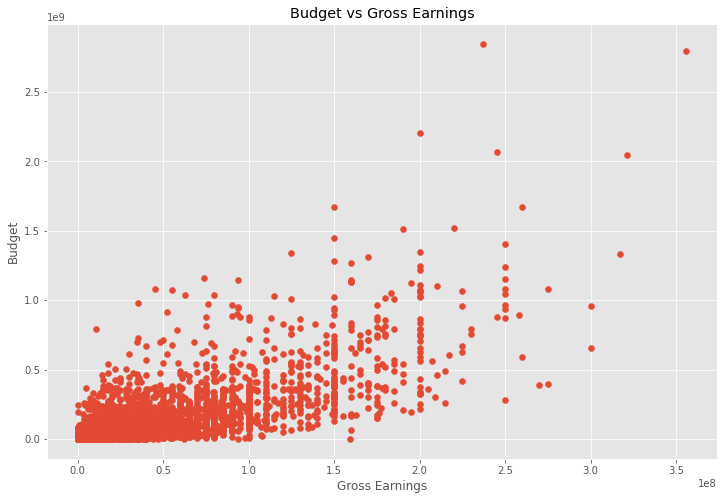

In [226]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

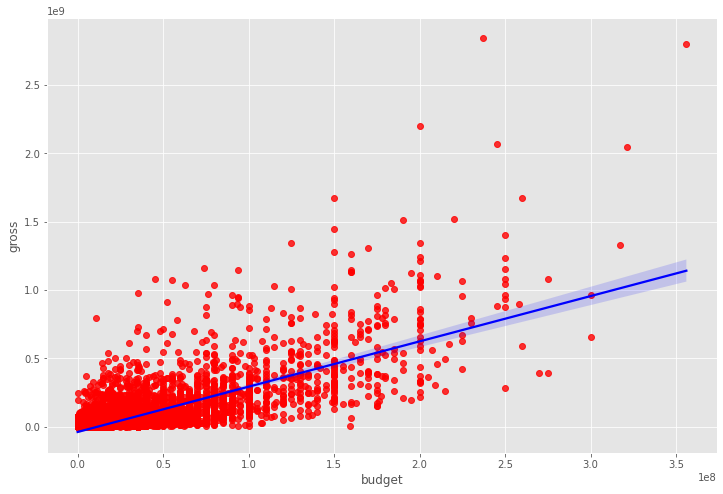

In [227]:
# Regression Plot for Budget vs Gross

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

<AxesSubplot:xlabel='votes', ylabel='gross'>

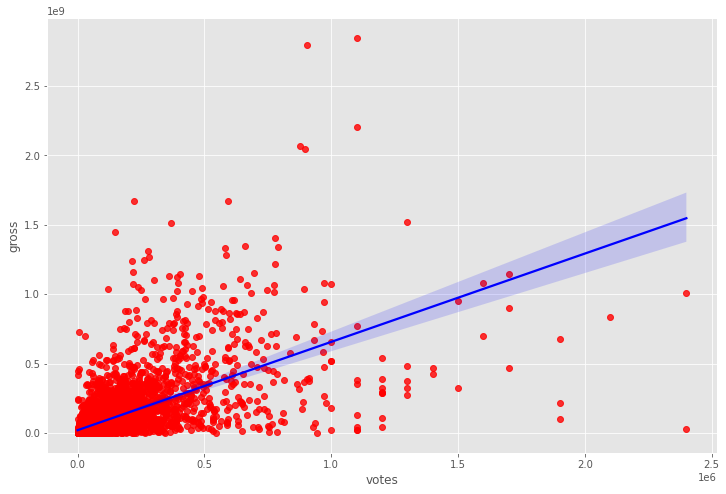

In [155]:
# Regression Plot for Votes vs Gross

sns.regplot(x = 'votes', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws = {"color":"blue"})

In [228]:
# Correlation between variables
corr_matrix = df.corr()
corr_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


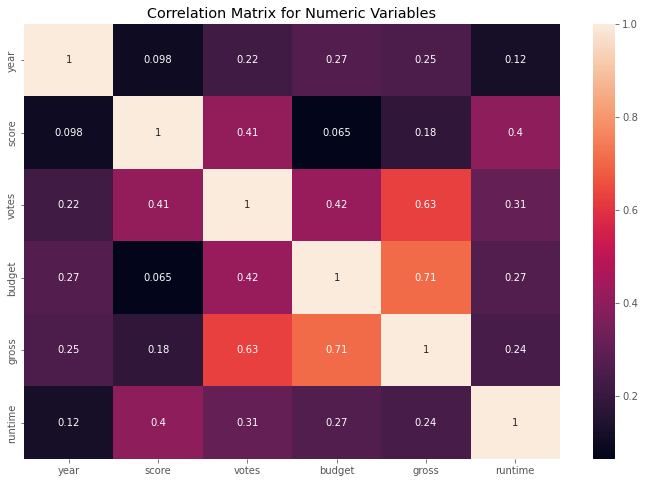

In [229]:
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

The two numerical variables votes and budget have somewhat high correlations to gross earnings.  
There is a positive correlation of 0.71 between budget and gross earnings, and 0.63 between votes and gross earnings. 